In [172]:
import pandas as pd

In [173]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

# Pandas Question

In [175]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below


In [176]:
data.groupby(["MaritalDesc","Sex"]).\
agg(min_salary=("Salary","min"),median_slary=("Salary","median"),max_salary=("Salary","max"),Average_salary=("Salary","mean"))

min_salary  median_slary  max_salary  Average_salary
MaritalDesc Sex                                                      
Divorced    F         45069       59393.0       68182    57345.500000
            M         45115       63738.5      148999    72520.857143
Married     F         45433       62662.0      250000    69638.986111
            M         46120       63370.5      157000    70089.038462
Separated   F         52984       60627.0       66149    60658.888889
            M         64397       70468.0       74417    69760.666667
Single      F         45395       62068.0      220450    68988.266667
            M         46428       63055.5      178000    71340.048387
Widowed     F         45046       63303.5      107226    69719.750000
            M         52788       61359.0       67176    60670.500000

In [177]:
# 2.What is top-5 reason of termination?
# Expected Output as below


In [178]:
data.groupby(["TermReason"]).agg(total_termination=("Termd","sum")).sort_values(by="total_termination",ascending=False).head(5)

,total_termination
TermReason,
Another position,20
unhappy,14
more money,11
career change,9
hours,8


In [179]:
# 3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
# Hints: Use filter for Performance Score first. Don't forget to sort_values
# Expected Output as below


In [180]:
data[["RecruitmentSource","PerformanceScore"]].\
    loc[(data["PerformanceScore"]=="Exceeds")].\
        groupby(["RecruitmentSource"]).agg(total_recruit=("RecruitmentSource","count")).\
            sort_values("total_recruit",ascending=False).head(7)

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


In [181]:
# 4. How many managers in each department?
# Hints: use nunique() as aggregation function
# Expected Output as below

In [182]:
data[["Department","ManagerName"]].groupby(["Department"]).nunique()

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


In [183]:
# 5. What is Termination Ratio by Gender?
# Hints: use value_counts(normalize=True)
#Expected Output as below


In [184]:
data[["Sex","Termd"]].groupby(["Sex"]).value_counts(normalize=True)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
dtype: float64

# Create an EDA and Data Visualization

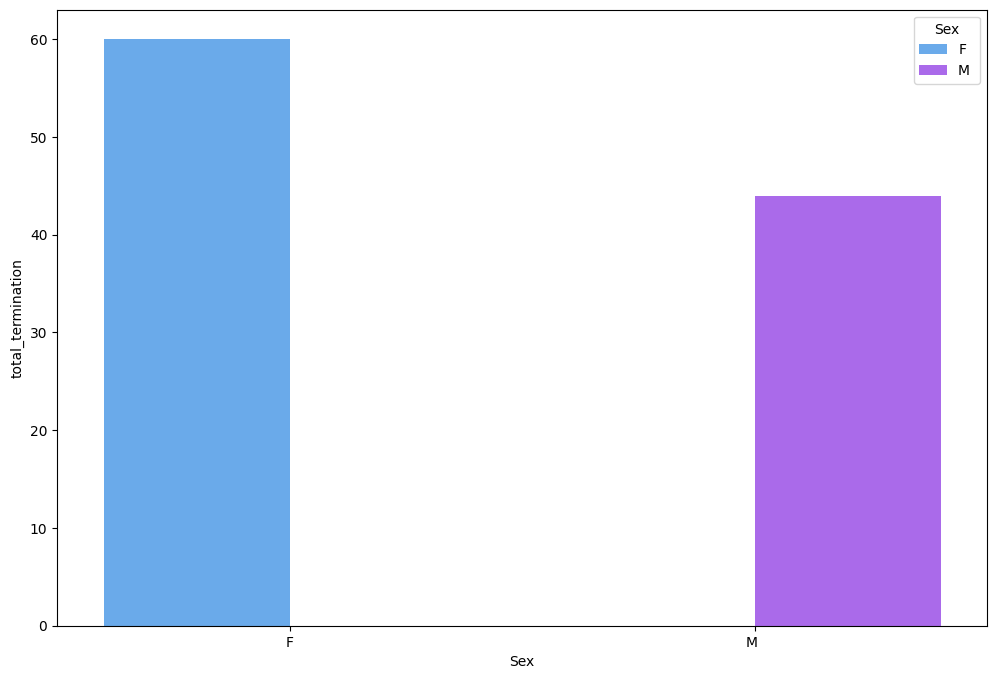

In [185]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

In [186]:
# to know the numerical field
data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


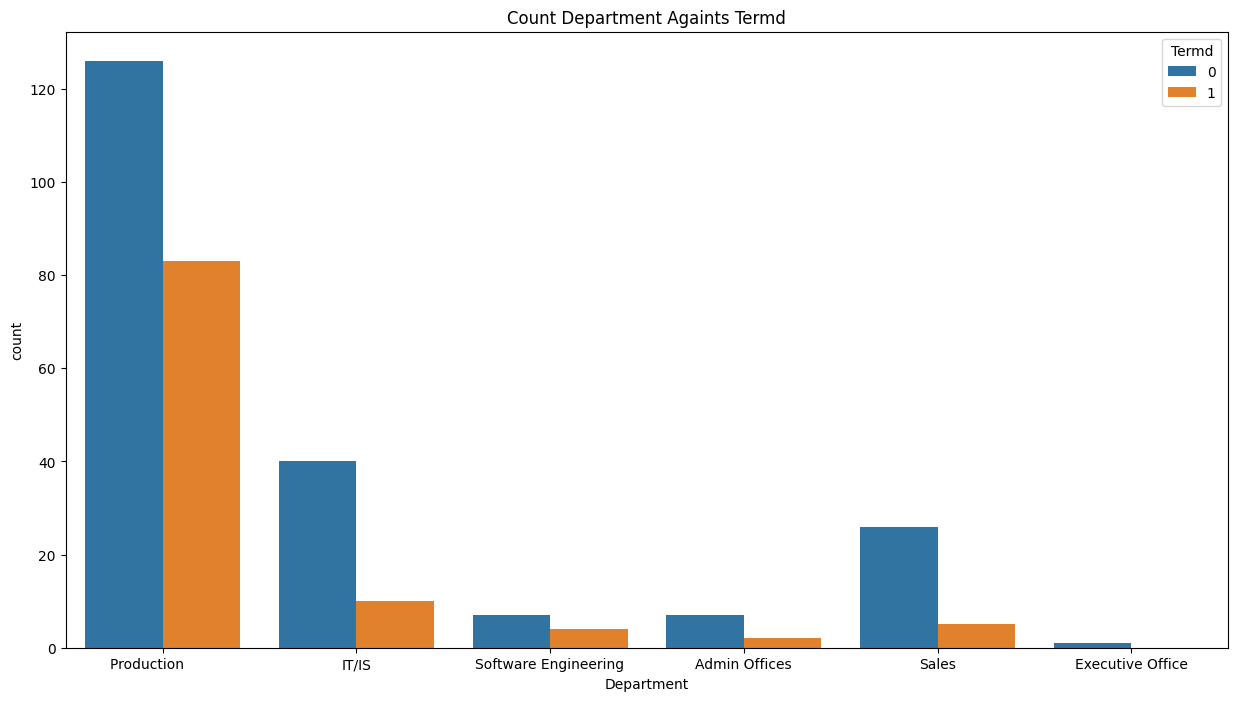

In [187]:
#Data Visualization 1
# term = data[["Department","ManagerName"]].groupby(["Department"]).nunique()
plt.figure(figsize=(15,8))
plt.title("Count Department Againts Termd")
x=data["Department"]
sns.countplot(data=data,x=x,hue="Termd")
plt.show()

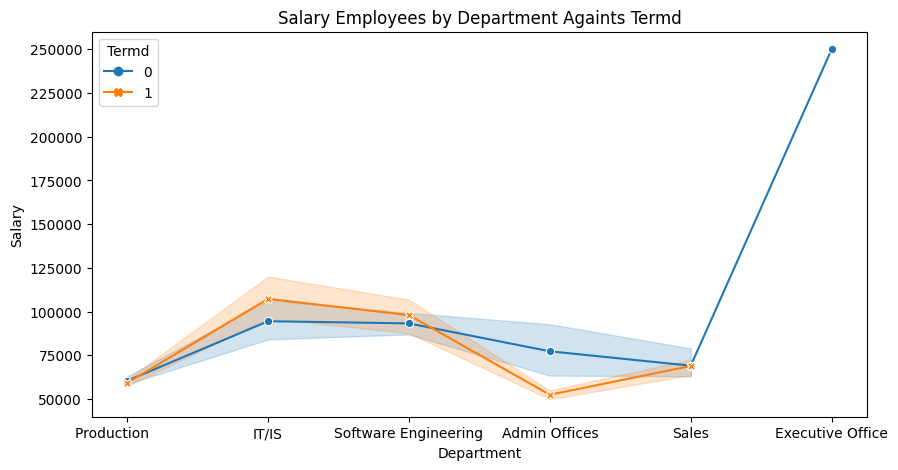

In [188]:
#Data Visualization 2
plt.figure(figsize=(10,5))
plt.title("Salary Employees by Department Againts Termd")
sns.lineplot(data=data,x="Department",y="Salary",hue="Termd",style="Termd",markers=True,dashes=False)
plt.show()

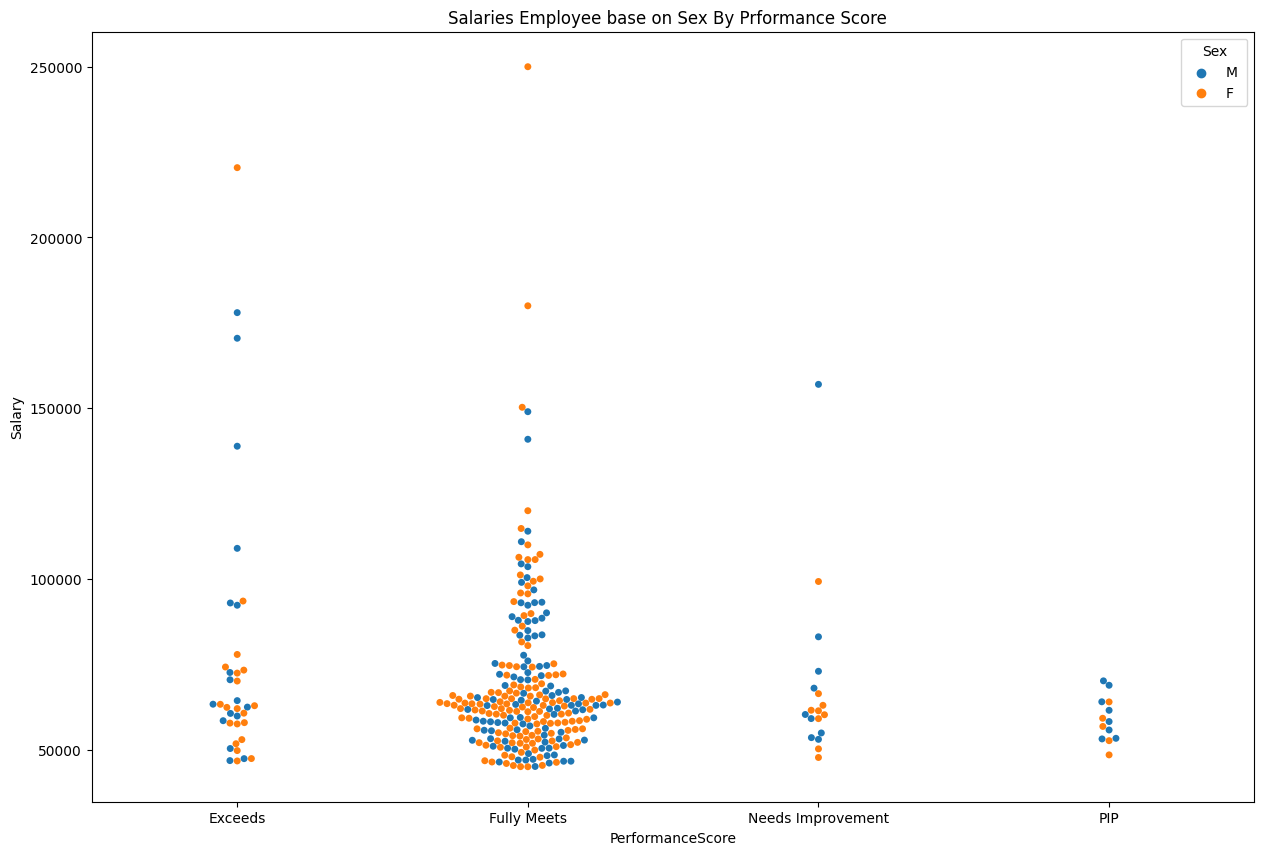

In [189]:
#Data Visualization 3
plt.figure(figsize=(15,10))
sns.swarmplot(data=data,x="PerformanceScore",y="Salary",hue="Sex")
plt.title("Salaries Employee base on Sex By Prformance Score  ")
plt.show()

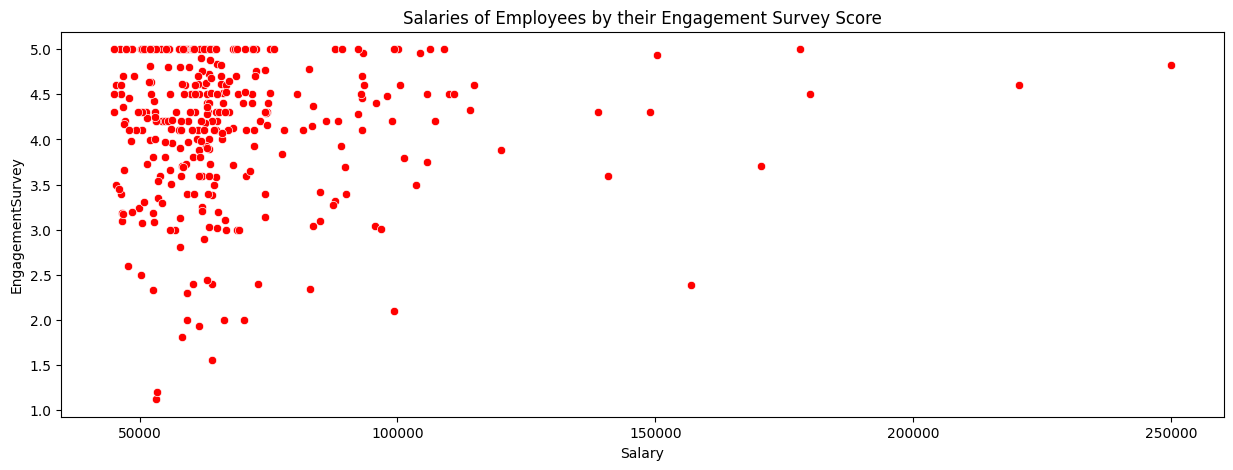

In [190]:
plt.figure(figsize=(15,5))

sns.scatterplot(x=data.Salary,y=data.EngagementSurvey,color="r")

plt.title("Salaries of Employees by their Engagement Survey Score")
plt.show()

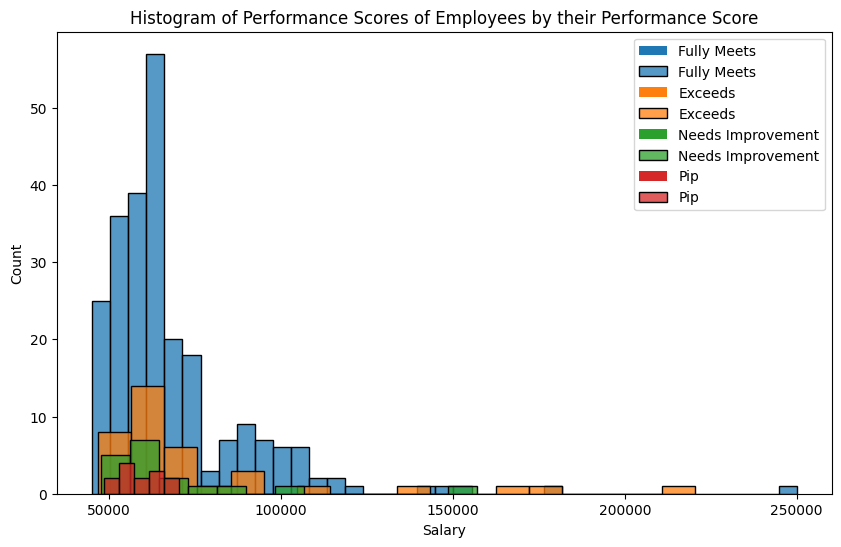

In [191]:
#Data Visualization 5
fully_meets = data[data["PerformanceScore"]=="Fully Meets"]
exceeds = data[data["PerformanceScore"]=="Exceeds"]
needs_improvement = data[data["PerformanceScore"]=="Needs Improvement"]
pip = data[data["PerformanceScore"]=="PIP"]

plt.figure(figsize=(10,6))
sns.histplot(fully_meets["Salary"], label="Fully Meets", kde=False)
sns.histplot(exceeds["Salary"] , label="Exceeds", kde=False)
sns.histplot(needs_improvement["Salary"], label="Needs Improvement", kde=False)
sns.histplot(pip["Salary"], label="Pip", kde=False)

plt.title("Histogram of Performance Scores of Employees by their Performance Score")

plt.legend()

plt.show()

# Create Machine Learning Model to Predict Termd

In [192]:
#Dependent Varible (target)
data_y = data["Termd"]

#Independent Variable (feature)
data_x = data.drop(["Termd"],axis=1)
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  PositionID                  311 non-null    int64  
 11  Position                    311 non-null    object 
 12  State                       311 non-null    object 
 13  Zip                         311 non

### NUll Check

In [193]:
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [194]:
data_x["DateofTermination"] #this not good data -> kill

0            NaN
1      6/16/2016
2      9/24/2012
3            NaN
4       9/6/2016
         ...    
306          NaN
307    9/29/2015
308          NaN
309          NaN
310          NaN
Name: DateofTermination, Length: 311, dtype: object

In [195]:
data_x["ManagerID"]

0      22.0
1       4.0
2      20.0
3      16.0
4      39.0
       ... 
306    20.0
307    12.0
308     2.0
309     4.0
310    14.0
Name: ManagerID, Length: 311, dtype: float64

In [196]:
data_x["ManagerID"].fillna(data_x["ManagerID"].mean(),inplace=True)

In [197]:
data_x.drop(["DateofTermination"],axis=1,inplace=True)

In [198]:
data_x.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialProjectsCount          0
LastPerf

In [199]:
# on retire les colonnes inutiles
data_x.drop([
        'Employee_Name', 'EmpID', 'MaritalStatusID', 'PositionID', 'DeptID', 'PerfScoreID', 'EmpStatusID', 
        'EmploymentStatus', 'TermReason', 'ManagerID'],axis=1,inplace=True)

In [200]:
data_x

,MarriedID,GenderID,FromDiversityJobFairID,Salary,Position,State,Zip,DOB,Sex,MaritalDesc,...,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,0,1,0,62506,Production Technician I,MA,1960,07/10/83,M,Single,...,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,1,1,0,104437,Sr. DBA,MA,2148,05/05/75,M,Married,...,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,1,0,0,64955,Production Technician II,MA,1810,09/19/88,F,Married,...,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,1,0,0,64991,Production Technician I,MA,1886,09/27/88,F,Married,...,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,0,0,0,50825,Production Technician I,MA,2169,09/08/89,F,Divorced,...,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,1,0,65893,Production Technician II,MA,1810,05/11/85,M,Single,...,Production,Kissy Sullivan,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,0,0,0,48513,Production Technician I,MA,2458,05/04/82,F,Single,...,Production,Brannon Miller,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,0,0,0,220450,CIO,MA,2067,08/30/79,F,Single,...,IT/IS,Janet King,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,0,0,0,89292,Data Analyst,MA,2148,02/24/79,F,Single,...,IT/IS,Simon Roup,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


# Convert categorical data to numerical data


### Dates data

In [201]:
def encode_dates(data, columns_with_prefixes):
    data = data.copy()
    for column, prefix in columns_with_prefixes:
        data[column] = pd.to_datetime(data[column])
        
        data[prefix + '_year'] = data[column].apply(lambda x: x.year)
        data[prefix + '_month'] = data[column].apply(lambda x: x.month)
        data[prefix + '_day'] = data[column].apply(lambda x: x.day)
        
        data = data.drop(column, axis=1)
    return data

In [202]:
data_time = ["DOB","DateofHire","LastPerformanceReview_Date"]
data_x[data_time]

,DOB,DateofHire,LastPerformanceReview_Date
0,07/10/83,7/5/2011,1/17/2019
1,05/05/75,3/30/2015,2/24/2016
2,09/19/88,7/5/2011,5/15/2012
3,09/27/88,1/7/2008,1/3/2019
4,09/08/89,7/11/2011,2/1/2016
...,...,...,...
306,05/11/85,7/7/2014,2/28/2019
307,05/04/82,9/2/2008,9/2/2015
308,08/30/79,4/10/2010,2/21/2019
309,02/24/79,3/30/2015,2/1/2019


In [203]:
date_columns = [('DOB', "DOB"), ('DateofHire', "DOH"), ('LastPerformanceReview_Date', "PRD")]
data_x = encode_dates(data_x, columns_with_prefixes=date_columns)

### Categorical data

In [204]:
def onehot_encode(data, columns_with_prefixes):
    data = data.copy()
    for column, prefix in columns_with_prefixes:
        dummies = pd.get_dummies(data[column], prefix=prefix)
        data = pd.concat([data, dummies], axis=1)
        data = data.drop(column, axis=1)
    return data

In [205]:
nominal_columns = [
    ('Position', "PS"),
    ('State', "ST"),
    ('Zip', "ZP"),
    ('MaritalDesc', "MD"),
    ('CitizenDesc', "CD"),
    ('HispanicLatino', "HL"),
    ('RaceDesc', "RD"),
    ('Department', "DE"),
    ('ManagerName', "MN"),
    ('RecruitmentSource', "RS"),
    ('Sex', 'S')
]
data_x = onehot_encode(data_x, columns_with_prefixes=nominal_columns)

In [211]:
def ordinal_encode(data, columns_with_orderings):
    data = data.copy()
    
    for column, ordering in columns_with_orderings:
        data[column] = data[column].apply(lambda x: ordering.index(x))
        
    return data

In [212]:
ordinal_columns = [
    ('PerformanceScore', ['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds'])
]
data_x = ordinal_encode(data_x, columns_with_orderings=ordinal_columns)

In [215]:
data_x.to_csv("Convert_categorical.csv")

In [207]:
#Start Modeling


# Answering the Question

a.	Is there any relationship between who a person works for (their manager) and their performance score?<br>
b.	What are our best recruiting sources if we want to ensure a low ratio of termination?<br>